## Final Project Submission

Please fill out:
* Student name: Martin Gregory Omondi
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Anntony Muiko
* Blog post URL:


# PHASE 2 PROJECT

## Introduction

#### We have reached the end of phase 2 of this course, now we will put together all skills to use with a large end-of-Phase project!
## Project Overview
#### For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem
#### Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Data
#### Our data will come from the dataset: tmdb.movies.csv 

## Getting Started
#### As in the previous labs, we'll make use of pandas furthermore we'll be able to write python strings, then display the results in a conveniently formatted table.

#### In the cell below, we:
#### 1. Import necessary libraries e.g pandas, numpy and matplotlib, sqlite3.

In [37]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from scipy import stats



## Read into the database available for data analysis.
### This allows us to analyse the data in the given database. In this project we shall be analyzing 3 different datasets e.g IMDB, Box Office Mojo dataset, TheMovieDB.

In [38]:
# Load TheMovieDB dataset
tm_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### IMDB database will follow in our data analysis. First step is to extract the database by unzipping it.


In [39]:
# Extract the IMDB database
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')
    

In [40]:
# Connect to sqlite3
conn = sqlite3.connect('unzippedData/im.db')



### We will now begin our data analysis on the im.db database to find our relevant tables.


In [41]:
# get a list of all tables in the database
tables = pd.read_sql("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table'
                     ;""", conn)

print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [42]:
# View data in a specific table

q0 = """
SELECT *
FROM movie_basics
;
"""

imdb_df = pd.read_sql(q0, conn)

imdb_df



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### We proceed to load a new dataset and store it under a dataframe variable.

In [43]:
# load the Box Office Mojo data
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [44]:
# This code returns the structure of the dataframe
bom_df.shape

(3387, 5)

### Below we will load our third dataset.

In [45]:
# Load tmdb movies dataset
tm_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tm_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Handling the missing values
### 1.Detecting missing values
#### We use the method .isna().sum() to find the sum of missing values per column.

In [46]:
# Checking for missing values
print(imdb_df.isna().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


### 2.Dropping missing values
### If column has too many missing values we will drop rows with missing values.


In [47]:
# The code below drop rows with missing values permanently
imdb_df.dropna(subset=['runtime_minutes', 'original_title', 'genres',], inplace=True )
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [48]:
# Check to confirm no more missing values in dataframe
imdb_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

### All missing values have been solved in the above dataframe.

In [49]:
# Check for missing values in dataframe
print(bom_df.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [50]:
# Drop columns with missing values
bom_df.drop(columns=['domestic_gross', 'foreign_gross'], inplace=True)
bom_df

,title,studio,year
0,Toy Story 3,BV,2010
1,Alice in Wonderland (2010),BV,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2010
3,Inception,WB,2010
4,Shrek Forever After,P/DW,2010
...,...,...,...
3382,The Quake,Magn.,2018
3383,Edward II (2018 re-release),FM,2018
3384,El Pacto,Sony,2018
3385,The Swan,Synergetic,2018


### Missing values in the second dataframe have also been resolved.

### The third dataframe, TheMovieDB dataset has no missing values therefore the dataset is clean. 

In [51]:
# Check for missing values in dataset
print(tm_df.isna().sum())

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


## We will now join/merge out dataframes to create one dataset for analysis.
### For this we wil use the pd.merge() method

In [52]:
# merge dataframes on the 'id' column
merged_df0 = pd.merge(bom_df, tm_df, on='title')

### This code will return a combined dataframe with many columns.

In [53]:
merged_df0

,title,studio,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,2018,"[53, 28]",459814,en,The Escape,0.600,2015-08-14,7.0,1
2699,The Escape,IFC,2018,"[53, 28]",417004,en,The Escape,1.176,2016-10-23,6.6,10
2700,Souvenir,Strand,2018,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14
2701,The Quake,Magn.,2018,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81


In [54]:
# We will merge the combined dataset with the other remaining dataframe
merged_df = pd.merge(merged_df0, imdb_df, on='original_title' )

In [55]:
# The final dataset as a result of the merged dataframes
merged_df

,title,studio,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,Souvenir,Strand,2018,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14,tt2387692,Souvenir,2016,90.0,"Drama,Music,Romance"
3038,Souvenir,Strand,2018,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3039,Souvenir,Strand,2018,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14,tt3478898,Souvenir,2014,86.0,Documentary
3040,The Quake,Magn.,2018,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81,tt6523720,The Quake,2018,106.0,"Action,Drama,Thriller"


In [56]:
#Confirm if our new merged dataframe has no missing values in it.
print(merged_df.isna().sum())

title                0
studio               0
year                 0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
movie_id             0
primary_title        0
start_year           0
runtime_minutes      0
genres               0
dtype: int64


## Summary statistics and Data Visualization

In [57]:
# This code will return a summary of central tendancy and dispersion of your data
merged_df.describe()

,year,id,popularity,vote_average,vote_count,start_year,runtime_minutes
count,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000
mean,2014.188692,223466.082512,9.889071,6.332972,1361.025641,2013.976989,102.353057
std,2.409131,140198.875893,7.287196,1.043891,2366.206510,2.460232,22.225555
min,2010.000000,1771.000000,0.600000,0.000000,1.000000,2010.000000,3.000000
25%,2012.000000,82322.500000,5.733250,5.800000,74.000000,2012.000000,91.000000
50%,2015.000000,235271.000000,8.819000,6.300000,434.500000,2014.000000,101.000000
75%,2016.000000,337894.250000,12.688000,7.000000,1500.500000,2016.000000,114.000000
max,2018.000000,561861.000000,80.773000,10.000000,22186.000000,2019.000000,272.000000


## Histogram
#### We will use this to visualize distribution of a single column

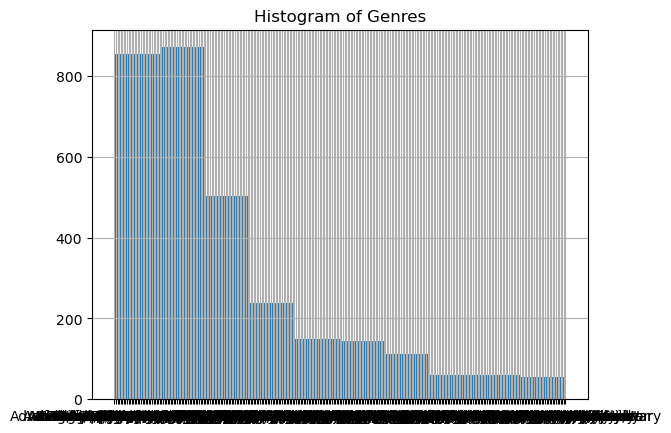

In [58]:
merged_df['genres'].hist(bins=10)
plt.title('Histogram of Genres')
plt.show()

## Scatter Plot
### This a visualization to represent relationships between two columns

<function matplotlib.pyplot.show(close=None, block=None)>

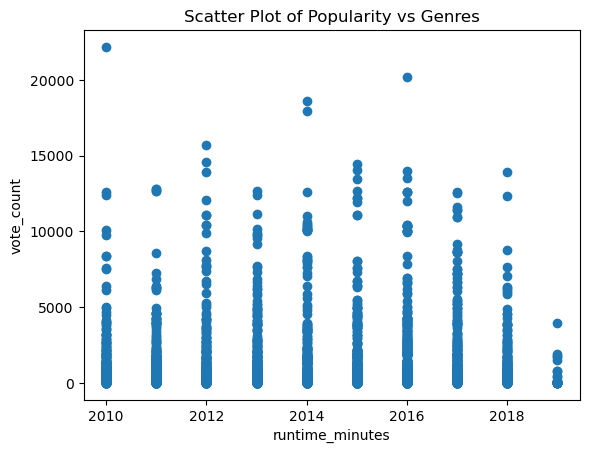

In [59]:
plt.scatter(merged_df['start_year'], merged_df['vote_count'])
plt.xlabel('runtime_minutes')
plt.ylabel('vote_count')
plt.title('Scatter Plot of Popularity vs Genres')
plt.show



# Perform a Hypothesis Test
### We will perform a hypothesis test on vote_average
### 1.Formulate a null hypothesis and alternative hypothesis


In [60]:
import pandas as pd
from scipy import stats

# Formulate a null and alternative hypothesis
#  Null hypothesis: the average vote_average is 7.0
# Alternative hypothesis: the average vote_average is not 7.0

# Calculate the sample mean and standard deviation
sample_mean = merged_df['vote_average'].mean()
sample_std = merged_df['vote_average'].std()

# Calculate the test statistic and p-value
t_stat, p_val = stats.ttest_1samp(merged_df['vote_average'], 7.0)

print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample standard deviation: {sample_std:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# If the p-value is less than the significance level (e.g. 0.05),
# We reject the null hypothesis
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Sample mean: 6.33
Sample standard deviation: 1.04
T-statistic: -35.24
P-value: 0.0000
Reject the null hypothesis


In [61]:
merged_df.columns

Index(['title', 'studio', 'year', 'genre_ids', 'id', 'original_language',
       'original_title', 'popularity', 'release_date', 'vote_average',
       'vote_count', 'movie_id', 'primary_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')